Modified from [Eleanor Lutz's code](https://github.com/eleanorlutz/earth_atlas_of_space/blob/main/raster_data.ipynb)
Requires the `cartopy` package - [installation here](https://scitools.org.uk/cartopy/docs/latest/installing.html#installing)


In [1]:
import glob
import pandas as pd
import numpy as np
import cartopy.crs as ccrs

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
from matplotlib.colors import LinearSegmentedColormap as lsc
%matplotlib inline


In [2]:
# Define variables used across all maps (size, color, projection center points)

figsize = (19.53/2, 18.55/2)
figsize_small = (9.235*(835/5536), 9.235*(835/5536))

ortho = [330, 30]
ortho_opp = [150, 0]
ortho_small = [60, 30]
ortho_n = [330, 90]
ortho_s = [330, -90]

img_extent = (-180, 180, -90, 90)

In [3]:
# Define function to save images in a standardized way 

def set_save_image(fig, savename, dpi=600):
    # Output text as editable PDF text objects instead of shapes
    matplotlib.rcParams['pdf.fonttype'] = 42
    
    # Force PDF to respect zorder by supressing image compositing
    matplotlib.rcParams['image.composite_image'] = False

    # Remove borders on the plot axes
    for ax in fig.get_axes():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        try:
            ax.set_global()
            ax.background_patch.set_fill(False) # DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.GeoAxes.patch
        except:
            pass

    # Remove all padding and margins
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")

    plt.clf()
    plt.close('all')


In [5]:
filenames = glob.glob("jpg_maps/blue_marble/*.jpg")
filenames

# recode as a for loop to run all months - for now just doing jan
for readname in filenames:
    month = readname.split("_")[-1].split("\\")[-1].split("_")[0].split(".")[0]
    savename = 'processed_maps/blue_marble/'+month+'_earth.png'

    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.Orthographic(*ortho))
    img = plt.imread(readname)
    ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
        interpolation='spline36', regrid_shape=4000)
    

    set_save_image(fig, savename)
    print("Finished with file for:", month)

/var/folders/4t/wld3283s0_98kx01lh0fggmh0000gn/T/ipykernel_47617/2242728433.py:20: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False) # DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.GeoAxes.patch


Finished with file for: 1
Finished with file for: 2
Finished with file for: 3
Finished with file for: 7
Finished with file for: 6
Finished with file for: 4
Finished with file for: 5
Finished with file for: 8
Finished with file for: 9
Finished with file for: 12
Finished with file for: 11
Finished with file for: 10


In [ ]:
# PLOT ICE SHEETS FOR LARGE EARTH IMAGE AT CENTER

filenames = glob.glob("csv_maps/sea_ice/*.CSV")

for readname in filenames: 
    month = readname.split("-")[1]
    savename = "processed_maps/sea_ice/" +month+ "_ice.png"
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.Orthographic(*ortho))
    df = pd.read_csv(readname, header=None)
    ax.imshow(df.values, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
              interpolation='spline36', regrid_shape=4000, cmap="gray", vmin=0, vmax=100)
    print(readname)


    set_save_image(fig, savename)
    print("Finished with file for:", month)

In [7]:
# PLOT ICE SHEETS FOR SMALL NORTH AND SOUTH GLOBES

filenames = glob.glob("csv_maps/sea_ice/*.CSV")
orthos = ortho_n, ortho_s
labels = "N", "S"

#filenames = filenames[0:2]




In [8]:

for readname in filenames: 
    for orth, label in zip(orthos, labels):
        month = readname.split("-")[1]
        savename = "processed_maps/sea_ice/"+label+"_"+month+'_ice.png'
        
        fig = plt.figure(figsize=figsize_small)
        ax = plt.axes(projection=ccrs.Orthographic(*orth))
        df = pd.read_csv(readname, header=None)
        ax.imshow(df.values, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
                  interpolation='spline36', regrid_shape=4000, cmap="gray", vmin=0, vmax=100)
        
        set_save_image(fig, savename)
        print("Finished with files for:", label, month)

/var/folders/4t/wld3283s0_98kx01lh0fggmh0000gn/T/ipykernel_48664/2242728433.py:20: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False) # DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.GeoAxes.patch


Finished with files for: N 01
Finished with files for: S 01
Finished with files for: N 04
Finished with files for: S 04
Finished with files for: N 05
Finished with files for: S 05
Finished with files for: N 12
Finished with files for: S 12
Finished with files for: N 11
Finished with files for: S 11
Finished with files for: N 06
Finished with files for: S 06
Finished with files for: N 03
Finished with files for: S 03
Finished with files for: N 09
Finished with files for: S 09
Finished with files for: N 10
Finished with files for: S 10
Finished with files for: N 08
Finished with files for: S 08
Finished with files for: N 07
Finished with files for: S 07
Finished with files for: N 02
Finished with files for: S 02


In [4]:
# PLOT RASTER IMAGES FOR SMALL EARTH IMAGES ON UPPER LEFT & RIGHT
filenames = glob.glob("jpg_maps/blue_marble/*.jpg")
#filenames = filenames[0:2]
orthos = ortho_n, ortho_s
labels = "N", "S"

for readname in filenames: 
    for orth, label in zip(orthos, labels):
        month = readname.split("_")[-1].split("\\")[-1].split("_")[0].split(".")[0]
        savename = "processed_maps/blue_marble/"+label+"_"+month+'_earth.png'
        
        fig = plt.figure(figsize=figsize_small)
        ax = plt.axes(projection=ccrs.Orthographic(*orth))
        img = plt.imread(readname)
        ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
                  interpolation='spline36', regrid_shape=4000)

        
        set_save_image(fig, savename)
        print("Finished with files for:", label, month)

/var/folders/4t/wld3283s0_98kx01lh0fggmh0000gn/T/ipykernel_50520/2242728433.py:20: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False) # DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.GeoAxes.patch


Finished with files for: N 1
Finished with files for: S 1
Finished with files for: N 2
Finished with files for: S 2
Finished with files for: N 3
Finished with files for: S 3
Finished with files for: N 7
Finished with files for: S 7
Finished with files for: N 6
Finished with files for: S 6
Finished with files for: N 4
Finished with files for: S 4
Finished with files for: N 5
Finished with files for: S 5
Finished with files for: N 8
Finished with files for: S 8
Finished with files for: N 9
Finished with files for: S 9
Finished with files for: N 12
Finished with files for: S 12
Finished with files for: N 11
Finished with files for: S 11
Finished with files for: N 10
Finished with files for: S 10


<!-- Here I am just checking to see whether the GeoAxes patch thing seems to matter: -->

/var/folders/4t/wld3283s0_98kx01lh0fggmh0000gn/T/ipykernel_50520/3740775580.py:24: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(True) # DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.GeoAxes.patch


Finished with files for: N 1
Finished with files for: S 1
Finished with files for: N 2


KeyboardInterrupt: 

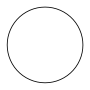

In [5]:
# # PLOT RASTER IMAGES FOR SMALL EARTH IMAGES ON UPPER LEFT & RIGHT
# filenames = glob.glob("jpg_maps/blue_marble/*.jpg")
# filenames = filenames[0:2]
# orthos = ortho_n, ortho_s
# labels = "N", "S"

# def set_save_image_bkg(fig, savename, dpi=600):
#     # Output text as editable PDF text objects instead of shapes
#     matplotlib.rcParams['pdf.fonttype'] = 42
    
#     # Force PDF to respect zorder by supressing image compositing
#     matplotlib.rcParams['image.composite_image'] = False

#     # Remove borders on the plot axes
#     for ax in fig.get_axes():
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.spines['bottom'].set_visible(False)
#         ax.spines['left'].set_visible(False)
#         ax.spines['top'].set_visible(False)
#         ax.spines['right'].set_visible(False)
#         try:
#             ax.set_global()
#             ax.background_patch.set_fill(True) # DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.GeoAxes.patch
#         except:
#             pass

#     # Remove all padding and margins
#     plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
#     plt.margins(0,0)
#     plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
#     plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
#     if savename.split('.')[-1] == 'pdf':
#         pp = pdf.PdfPages(savename, keep_empty=False)
#         pp.savefig(fig)
#         pp.close()
#     elif savename.split('.')[-1] == 'png':
#         plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
#     else:
#         print("Unrecognized file format, plot not saved!")

#     plt.clf()
#     plt.close('all')

# for readname in filenames: 
#     for orth, label in zip(orthos, labels):
#         month = readname.split("_")[-1].split("\\")[-1].split("_")[0].split(".")[0]
#         savename = "processed_maps/blue_marble/"+label+"_"+month+'_earth_bkg.png'
        
#         fig = plt.figure(figsize=figsize_small)
#         ax = plt.axes(projection=ccrs.Orthographic(*orth))
#         img = plt.imread(readname)
#         ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), 
#                   interpolation='spline36', regrid_shape=4000)

        
#         set_save_image_bkg(fig, savename)
#         print("Finished with files for:", label, month)